In [1]:
# The notebook takes the csv file generated from the netlogo file and generate better plots

import numpy as np   # just in case we need to handle arrays
import matplotlib.pyplot as plt  # for plotting
import pandas as pd   # to convert csv to dataframe


#reading the csvs from netlogo to get dataframes

df_population = pd.read_csv('population.csv',header = 13)
df_population.head()

df_wealth = pd.read_csv('wealth.csv',header = 12)
df_wealth.head()

df_nature = pd.read_csv('nature.csv',header = 12)
df_nature.head()

# Chopping up the required columns

# population of commoners and elites

df_new_pop = df_population.iloc[:,[0,1]]
df_new_pop.head()

try:
    df_new_elite = df_population.iloc[:,[0,5]]
    df_new_elite.head()
except:
    pass

# wealth in the model

df_new_wealth = df_wealth.iloc[:,[0,1]]
#df_new_wealth.head()

# nature in the model

df_new_nature = df_nature.iloc[:,[0,1]]
#df_new_nature.head()

# makes one plot with subplots

fontname="Times New Roman"

plt.figure(figsize=(30,10))



plt.subplot(1,3,1)
plt.title("POPULATION WITH TIME", fontname=fontname,fontsize=25)
plt.plot(df_new_pop['x'],df_new_pop['y'],"r",label = "Commoners")
plt.plot(df_new_elite['x'],df_new_elite['y.1'],"b", label = "Elites")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xlabel('Ticks',fontname=fontname, fontsize=20)
plt.ylabel('Population',fontname=fontname,fontsize=20)
plt.legend()

plt.subplot(1,3,2)
plt.title("NATURE WITH TIME",fontname=fontname,fontsize=25)
plt.plot(df_new_nature['x'],df_new_nature['y'],"g", label = "Nature - Eco-$s")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xlabel('Ticks',fontname=fontname,fontsize=20)
plt.ylabel('Nature (Eco Dollars - *$)',fontname=fontname,fontsize=20)
plt.legend()

plt.subplot(1,3,3)
plt.title("WEALTH WITH TIME",fontname=fontname,fontsize=25)
plt.plot(df_new_wealth['x'],df_new_wealth['y'],"b", label = "Wealth - Eco-$s")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xlabel('Ticks',fontname=fontname,fontsize=20)
plt.ylabel('Wealth (Eco Dollars - *$)',fontname=fontname,fontsize=20)
plt.legend()
plt.suptitle("AGENT-BASED SIMULATION OF HANDY MODEL",fontname=fontname,fontsize=35)
plt.tight_layout()
plt.savefig('HANDY_ABM_sim.png')


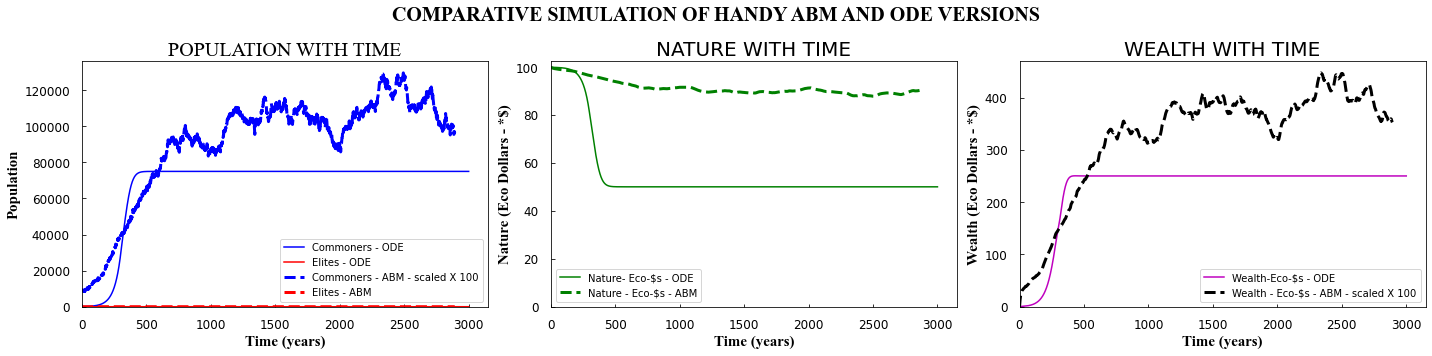

In [7]:
############################## IMPORTING THE RIGHT LIBRARIES ########################################

import numpy as np                       # for mathematical functions
import matplotlib.pyplot as plt          #for plotting the results

#####################################################################################################

############################## INITIALIZING CONSTANTS ###############################################

nominal_death_rate = 1E-2
famine_death_rate = 7E-2
commoners_birth_rate = 3E-2
elites_birth_rate = 3E-2
subsistence_salary = 5E-4
threshold_wealth_pc = 5E-3
regeneration_rate = 1E-2
nature_carrying_capacity = 1E+2
inequality_factor = 0   # we try 1, 10 and 100

#####################################################################################################

############################# INITIALIZING VARIABLES ###############################################
time_step = 0.1
start_time = 0
end_time = 3000
time  = np.arange(start_time, end_time, time_step)
time = np.reshape(time, (-1,1))
commoner_population = np.empty([len(time),1])
commoner_population[0] = 100
elite_population = np.empty([len(time),1])
elite_population[0] = 0
nature = np.empty([len(time),1], dtype = "float")
nature[0] = nature_carrying_capacity
accum_wealth = np.empty([len(time),1])
accum_wealth[0] = 0
famine_ratio = np.empty([len(time),1])
famine_ratio[0] = 0
wealth_threshold = np.empty([len(time),1])
wealth_threshold[0] = 0
#controls of simulation
production_factor =6.66E-6
pop_dim = (famine_death_rate - commoners_birth_rate) / (famine_death_rate - nominal_death_rate)
#print(pop_dim)

############################# CODE FOR THE SIMULATION ####################################
# Please do not chnage this section unless you are confident in what you are doing. #

def HANDY(time):
    for i in range (0, len(time)-1):
    #updating the varibale
        wealth_threshold[i] = threshold_wealth_pc * commoner_population[i] + inequality_factor * threshold_wealth_pc * elite_population[i]
        famine_ratio[i] = accum_wealth[i]/wealth_threshold[i]
        if (famine_ratio[i] > 1):
            commoner_population[i+1] = commoner_population[i] + time_step*((commoners_birth_rate*commoner_population[i] - nominal_death_rate*commoner_population[i]))
            elite_population[i+1] = elite_population[i] + time_step*((elites_birth_rate*elite_population[i] - nominal_death_rate*elite_population[i]))
            nature[i+1] = nature[i] + time_step*(((regeneration_rate * nature[i] * (nature_carrying_capacity - nature[i])) - (production_factor * commoner_population[i] * nature[i])))
            accum_wealth[i+1] = accum_wealth[i] + time_step*((production_factor * commoner_population[i] * nature[i]) - subsistence_salary * commoner_population[i] - inequality_factor * subsistence_salary * elite_population[i])
        else:
            commoner_population[i+1] = commoner_population[i] + time_step*((commoners_birth_rate*commoner_population[i] - (nominal_death_rate + (1- famine_ratio[i])* (famine_death_rate - nominal_death_rate)) *commoner_population[i]))
            elite_population[i+1] = elite_population[i] + time_step*((elites_birth_rate*elite_population[i] - (nominal_death_rate + (1- famine_ratio[i]*inequality_factor)* (famine_death_rate - nominal_death_rate)) * elite_population[i]))
            nature[i+1] = nature[i] + time_step*(((regeneration_rate * nature[i] * (nature_carrying_capacity - nature[i])) - (production_factor * commoner_population[i] * nature[i])))
            accum_wealth[i+1] = accum_wealth[i] + time_step* ((production_factor * commoner_population[i] * nature[i]) - famine_ratio[i] * subsistence_salary * commoner_population[i] - famine_ratio[i] * inequality_factor * subsistence_salary * elite_population[i])


########################## CALLING HANDY ##################################################

HANDY(time)
            
########################## PLOTTING THE RESULTS ###########################################

fontname="Times New Roman"
linewidth = 3
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("POPULATION WITH TIME",   fontname = fontname)
plt.plot(time,commoner_population,"b-", label = "Commoners - ODE")
plt.plot(time,elite_population*10,"r-", label = "Elites - ODE")
plt.plot(df_new_pop['x'],df_new_pop['y']*100,"b--",linewidth=linewidth,label = "Commoners - ABM - scaled X 100")
plt.plot(df_new_elite['x'],df_new_elite['y.1'],"r--",linewidth=linewidth, label = "Elites - ABM")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tick_params(axis ='both', which ='major',direction ="in", labelsize = 12, pad = 12)
plt.ylabel("Population", fontweight='bold', fontname = fontname)
plt.xlabel("Time (years)", fontweight='bold', fontname = fontname)
plt.legend()

plt.subplot(1,3,2)
plt.title("NATURE WITH TIME")
plt.plot(time,nature,"g-", label = "Nature- Eco-$s - ODE")
plt.plot(df_new_nature['x'],df_new_nature['y'],"g--",linewidth=linewidth, label = "Nature - Eco-$s - ABM")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tick_params(axis ='both', which ='major',direction ="in", labelsize = 12, pad = 12)
plt.ylabel("Nature (Eco Dollars - *$)", fontweight='bold', fontname = fontname)
plt.xlabel("Time (years)", fontweight='bold', fontname = fontname)
plt.legend()

plt.subplot(1,3,3)
plt.title("WEALTH WITH TIME")
plt.plot(time,accum_wealth, "m-", label = "Wealth-Eco-$s - ODE")
plt.plot(df_new_wealth['x'],df_new_wealth['y']* 100,"k--",linewidth=linewidth, label = "Wealth - Eco-$s - ABM - scaled X 100")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tick_params(axis ='both', which ='major',direction ="in", labelsize = 12, pad = 12)
plt.ylabel("Wealth (Eco Dollars - *$)", fontweight='bold', fontname = fontname)
plt.xlabel("Time (years)", fontweight='bold', fontname = fontname)
plt.legend()
plt.suptitle("COMPARATIVE SIMULATION OF HANDY ABM AND ODE VERSIONS", fontweight='bold', fontname = fontname, fontsize= 20)

plt.tight_layout()

plt.savefig("Optimal_Equitable_Simulation.jpg")
plt.show()

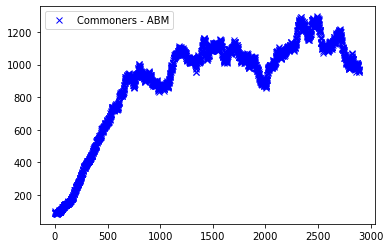

In [3]:
plt.plot(df_new_pop['x'],df_new_pop['y'],"bx",label = "Commoners - ABM")
plt.legend()